In [1]:
import json
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import nltk
import pandas as pd
import numpy as np

# json1_file = open('hwzScraper\hwzScraper\data69.json')
# json1_str = json1_file.read()
# text = json.loads(json1_str)
df = pd.read_json('hwzScraper\hwzScraper\data69.json')

In [2]:
# extract data by year
dataset_2014 = df[df['timestamp'].str.contains('2019')]

dataset_msg = df['message']
dataset_msg.count()


40773

In [3]:
words = []

tokenizer = RegexpTokenizer(r'\w+')

for msg in dataset_msg:
    words.append(tokenizer.tokenize(str(msg)))

# How many words are in this news article?
print (len(words))

40773


In [4]:
words = []

tokenizer = RegexpTokenizer(r'\w+')

for msg in dataset_msg:
    words.append(tokenizer.tokenize(str(msg)))

print (len(words))

40773


In [5]:
nltk.download('stopwords')

stop_words = stopwords.words('english')
stop_words.append('https')
stop_words.append('image')
stop_words.append('uni')
stop_words.append('gpa')
stop_words.append('apply')
stop_words.append('ntu')
stop_words.append('smu')
stop_words.append('applied')
stop_words.append('nus')
stop_words.append('hi')
stop_words.append('1')
stop_words.append('2')
stop_words.append('3')
stop_words.append('wrote')
stop_words.append('u')
stop_words.append('also')
stop_words.append('would')
stop_words.append('yet')
stop_words.append('anyone')
stop_words.append('5')
stop_words.append('one')
stop_words.append('may')
stop_words.append('using')
stop_words.append('thanks')
stop_words.append('sure')
stop_words.append('years')
stop_words.append('4')
stop_words.append('want')
stop_words.append('went')
stop_words.append('need')
stop_words.append('since')
stop_words.append('school')
stop_words.append('good')
stop_words.append('even')
stop_words.append('courses')
stop_words.append('much')
stop_words.append('already')
stop_words.append('really')
stop_words.append('next')
stop_words.append('guys')
stop_words.append('see')
stop_words.append('level')
stop_words.append('take')
stop_words.append('time')
stop_words.append('people')
stop_words.append('rp')
stop_words.append('ur')
stop_words.append('though')
stop_words.append('haha')
stop_words.append('right')
stop_words.append('student')
stop_words.append('yeah')
stop_words.append('hahaha')
stop_words.append('e')
stop_words.append('hardwarezone')
stop_words.append('forums')
stop_words.append('com')
stop_words.append('corn')
stop_words.append('oneplus')
stop_words.append('A6000')
stop_words.append('pcwx')
stop_words.append('sent')
stop_words.append('redmi')
stop_words.append('app')
stop_words.append('samsung')
stop_words.append('sm')
stop_words.append('n920i')
stop_words.append('xiaomi')
stop_words.append('note')
stop_words.append('gagt')
stop_words.append('www')
stop_words.append('edu')
stop_words.append('http')
stop_words.append('sg')
stop_words.append('think')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huiqi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
words_filtered = []

for w in words:
    for i in w:
        if i.lower() not in stop_words:
            words_filtered.append(i)

# After removing stop words, how many words remain?
# print (len(words_filtered))

In [7]:
fdist = FreqDist(words_filtered)
# print(fdist)

In [8]:
fdist.most_common(50)

[('interview', 13041),
 ('got', 11109),
 ('get', 8570),
 ('offer', 8132),
 ('course', 7845),
 ('still', 7225),
 ('appeal', 7175),
 ('year', 7051),
 ('know', 6889),
 ('like', 5834),
 ('first', 5195),
 ('choice', 5101),
 ('go', 4588),
 ('received', 4399),
 ('rejected', 4231),
 ('application', 4215),
 ('poly', 4091),
 ('accepted', 3608),
 ('well', 3584),
 ('offered', 3485),
 ('chance', 3474),
 ('email', 3331),
 ('last', 3256),
 ('waiting', 3165),
 ('students', 2898),
 ('DA', 2868),
 ('going', 2780),
 ('results', 2751),
 ('news', 2615),
 ('ask', 2514),
 ('receive', 2508),
 ('friend', 2413),
 ('admission', 2348),
 ('biz', 2261),
 ('hope', 2248),
 ('best', 2226),
 ('offers', 2208),
 ('engineering', 2203),
 ('business', 2195),
 ('accept', 2149),
 ('FASS', 2144),
 ('getting', 2113),
 ('quite', 2110),
 ('chances', 1999),
 ('acceptance', 1995),
 ('science', 1915),
 ('window', 1905),
 ('better', 1890),
 ('say', 1888),
 ('second', 1884)]

In [9]:
porter_stemmer = PorterStemmer()

# Let's test out this stemmer.
some_words = ["SMU", "Admission", "acceptance"]
for w in some_words:
    print (porter_stemmer.stem(w))

# Let's stem all the words in our news article.
words_filtered_stemmed = []
for w in words_filtered:
    words_filtered_stemmed.append(porter_stemmer.stem(w))

# print (len(words_filtered_stemmed))

smu
admiss
accept


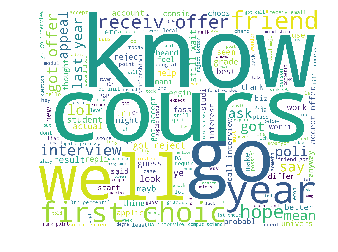

In [10]:
words_joined = " ".join([w for w in words_filtered_stemmed])

# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                         width=1800,
                         height=1400).generate(words_joined)
# plt.savefig('virusWordCloud.png', dpi=300)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
my_wordcloud.to_file('wordcloud_2019.png')